In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv('Retail_Data.csv', encoding = 'unicode_escape')

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
data.info() # viewing all info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
data.describe() #looking at numeric info

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Missing value Information

In [12]:
missing_values_sum = data.isnull().sum()
nan_values = data.isna().sum()
duplicates = data.duplicated().sum()
unique_values = data.nunique()

columns = pd.DataFrame({
    "missing_values_sum": missing_values,
    "nan_values": nan_values,
    "duplicates": duplicates,
    "unique_values": unique_values,
})

In [13]:
columns

,missing_values_sum,nan_values,duplicates,unique_values
InvoiceNo,0,0,5268,25900
StockCode,0,0,5268,4070
Description,1454,1454,5268,4223
Quantity,0,0,5268,722
InvoiceDate,0,0,5268,23260
UnitPrice,0,0,5268,1630
CustomerID,135080,135080,5268,4372
Country,0,0,5268,38


In [14]:
data = data.drop_duplicates()

In [15]:
data['Description'] = data['Description'].fillna("UNKNOWN")  # NA value was filled by UNKNOWN
data['CustomerID'] = data['CustomerID'].fillna(0)     # NA value was filled by 0

In [16]:
missing_values_sum = data.isnull().sum()
nan_values = data.isna().sum()
duplicates = data.duplicated().sum()
unique_values = data.nunique()
columns_a = pd.DataFrame({
    "missing_values": missing_values,
    "nan_values": nan_values,
    "duplicates": duplicates,
    "unique_values": unique_values,
})

In [17]:
columns_a

,missing_values,nan_values,duplicates,unique_values
InvoiceNo,0,0,0,25900
StockCode,0,0,0,4070
Description,1454,0,0,4224
Quantity,0,0,0,722
InvoiceDate,0,0,0,23260
UnitPrice,0,0,0,1630
CustomerID,135080,0,0,4373
Country,0,0,0,38


All the null values are cleare and the data is clean

In [18]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%d-%m-%Y %H:%M", dayfirst=True)
data['Quantity'] = pd.to_numeric(data['Quantity'])
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [20]:
#creating a separate column for time
data['Time'] = data['InvoiceDate'].dt.time
#creating a separate column for month
data['Month'] = data['InvoiceDate'].dt.month_name()
#creating a separate column for day name
data['Day'] = data['InvoiceDate'].dt.day_name()
#creating a column for year
data['Year']= data['InvoiceDate'].dt.year
#Calculate total sales
data['Total'] = data['Quantity']*data['UnitPrice']

In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34


Data Visualisation

<Axes: ylabel='UnitPrice'>

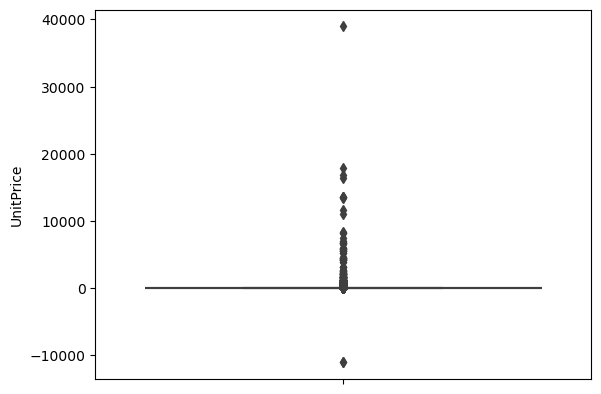

In [22]:
sns.boxplot(y = 'UnitPrice', data=data)

In [23]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.0,United Kingdom,14:51:00,August,Friday,2011,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.0,United Kingdom,14:52:00,August,Friday,2011,-11062.06


In [24]:
data[data['Description'].str.contains('debt', case=False)] # removing the data 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,0.0,United Kingdom,14:50:00,August,Friday,2011,11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.0,United Kingdom,14:51:00,August,Friday,2011,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.0,United Kingdom,14:52:00,August,Friday,2011,-11062.06


In [25]:
mask = data['Description'].str.contains('debt', case=False)
# Invert mask and use boolean indexing to filter out rows
data = data[~mask]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34


In [26]:
data = data[data['UnitPrice']>0] #filtering our data
#check the minimum
data['UnitPrice'].min()

0.001

<Axes: ylabel='Quantity'>

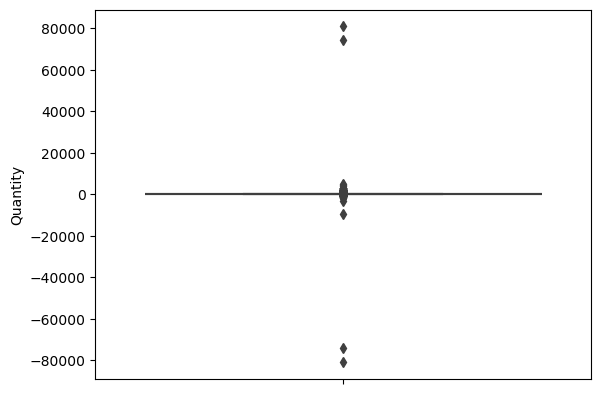

In [27]:
sns.boxplot(y = 'Quantity', data=data) #checking quantity less than 0

In [28]:
data[data['Quantity']<0] # filter data quantity < 0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,December,Wednesday,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,December,Wednesday,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,09:57:00,December,Friday,2011,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,10:28:00,December,Friday,2011,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,11:57:00,December,Friday,2011,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,11:58:00,December,Friday,2011,-1.25


In [30]:
cancelled_purchases = data[data['Quantity'] < 0] # canceled purchase for quantity < 0
data = data[data['Quantity']>0] #get quantity > 0
print(data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country      Time

TOTAL SALES PER MONTH

In [36]:
years = data['Year'].unique()
print(years)

[2010 2011]


In [31]:
sales_2010 = data[data['Year'] == 2010]
monthly_sales_2010 = sales_2010.groupby('Month')['Total'].sum().reset_index()
print(monthly_sales_2010)

      Month      Total
0  December  821452.73


In [32]:
sales_2011 = data[data['Year'] == 2011]
# Group by month and sum only the 'Total' column
monthly_sales_2011 = sales_2011.groupby('Month')['Total'].sum().reset_index()
print(monthly_sales_2011)

        Month        Total
0       April   536968.491
1      August   746779.320
2    December   637790.330
3    February   522545.560
4     January   689811.610
5        July   718076.121
6        June   760547.010
7       March   716215.260
8         May   769296.610
9    November  1503866.780
10    October  1151263.730
11  September  1056435.192


In [35]:
sales_2010 = data[data['Year'] == 2010]
# Group by month and sum only the 'Total' column
monthly_sales_2010 = sales_2010.groupby('Month')['Total'].sum().reset_index()
print(monthly_sales_2010)

      Month      Total
0  December  821452.73


In [37]:
# Define the correct month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Convert the 'Month' column to a categorical type with the correct order
monthly_sales_2010['Month'] = pd.Categorical(monthly_sales_2010['Month'], categories=month_order, ordered=True)
monthly_sales_2011['Month'] = pd.Categorical(monthly_sales_2011['Month'], categories=month_order, ordered=True)

# Sort the dataframes by the 'Month' column
monthly_sales_2010 = monthly_sales_2010.sort_values('Month')
monthly_sales_2011 = monthly_sales_2011.sort_values('Month')

monthly sales analysis

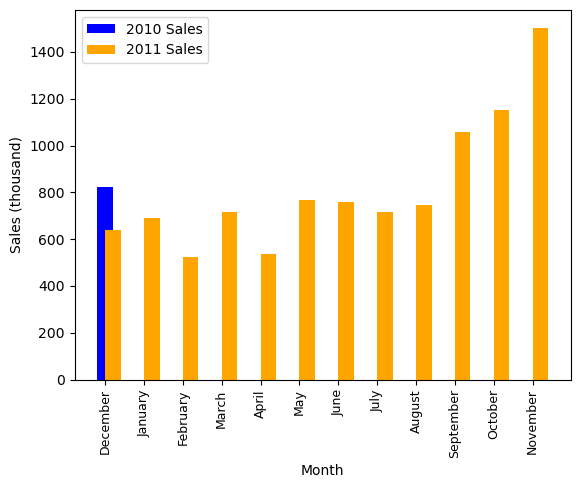

In [38]:
plt.bar(monthly_sales_2010["Month"],monthly_sales_2010['Total']/1000, label='2010 Sales', color='blue', width=0.4, align='center')
plt.bar(monthly_sales_2011["Month"],monthly_sales_2011['Total']/1000, label='2011 Sales', color='orange', width=0.4, align='edge')
plt.xticks(rotation = 'vertical',size = 9)
plt.ylabel("Sales (thousand)")
plt.xlabel("Month")
plt.legend()
plt.show()

In [39]:
data['Hour']=data['InvoiceDate'].dt.hour
BestTimeAdds = data.groupby('Hour').count().reset_index()

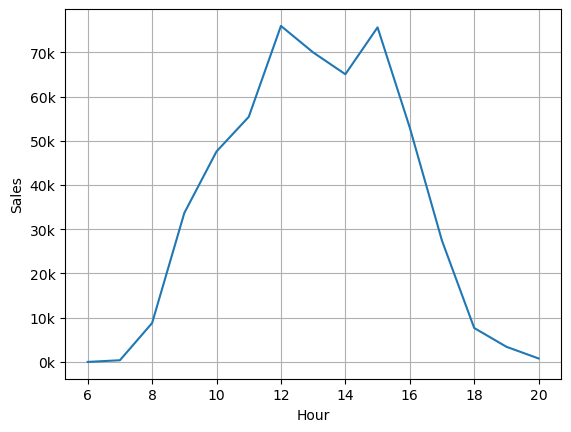

In [40]:
from matplotlib.ticker import StrMethodFormatter
plt.plot(BestTimeAdds['Hour'],BestTimeAdds['InvoiceNo']/1000)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
formatter = StrMethodFormatter('{x:.0f}k')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

time periode 12PM to 3PM have high total sales

In [41]:
soldTogether = data.groupby("InvoiceNo")['Description'].agg(lambda x : " , ".join(x)).reset_index()
soldTogether

,InvoiceNo,Description
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER , WHITE MET..."
1,536366,"HAND WARMER UNION JACK , HAND WARMER RED POLKA..."
2,536367,"ASSORTED COLOUR BIRD ORNAMENT , POPPY'S PLAYHO..."
3,536368,"JAM MAKING SET WITH JARS , RED COAT RACK PARIS..."
4,536369,BATH BUILDING BLOCK WORD
...,...,...
19954,581583,"LUNCH BAG RED RETROSPOT , 6 CHOCOLATE LOVE HEA..."
19955,581584,"RED FLOCK LOVE HEART PHOTO FRAME , 6 CHOCOLATE..."
19956,581585,"BLACK TEA TOWEL CLASSIC DESIGN , ASSORTED BOTT..."
19957,581586,"LARGE CAKE STAND HANGING STRAWBERY , SET OF 3..."


In [42]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in soldTogether['Description']:
    row_list = row.split(",")
    #item mostly solved together , here it shows 2 items sold together,we can change it to 3
    #to show 3 items sold together and so on ...
    count.update(Counter(combinations(row_list,2)))
#most_common is method from collections
for key,value in count.most_common(10):
    print(key,value)

(' KEY FOB ', ' KEY FOB ') 743
(' KEY FOB ', ' BACK DOOR  ') 544
(' KEY FOB ', ' SHED ') 511
(' JUMBO BAG PINK POLKADOT ', ' JUMBO BAG RED RETROSPOT ') 477
(' KEY FOB ', ' FRONT  DOOR  ') 455
(' GREEN REGENCY TEACUP AND SAUCER ', ' ROSES REGENCY TEACUP AND SAUCER  ') 443
('COFFEE', 'SUGAR ') 432
(' JUMBO SHOPPER VINTAGE RED PAISLEY ', ' JUMBO BAG RED RETROSPOT ') 427
(' SET 3 RETROSPOT TEA', 'COFFEE') 426
(' SET 3 RETROSPOT TEA', 'SUGAR ') 414


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524877 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524877 non-null  object        
 1   StockCode    524877 non-null  object        
 2   Description  524877 non-null  object        
 3   Quantity     524877 non-null  int64         
 4   InvoiceDate  524877 non-null  datetime64[ns]
 5   UnitPrice    524877 non-null  float64       
 6   CustomerID   524877 non-null  float64       
 7   Country      524877 non-null  object        
 8   Time         524877 non-null  object        
 9   Month        524877 non-null  object        
 10  Day          524877 non-null  object        
 11  Year         524877 non-null  int32         
 12  Total        524877 non-null  float64       
 13  Hour         524877 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(7)
memory usage: 56.1+ MB


In [48]:
soldMost = data.groupby('Description')[['Quantity']].sum().reset_index()
soldMost = soldMost.sort_values('Quantity',ascending = False ).head(10) 
soldMost

,Description,Quantity
2386,"PAPER CRAFT , LITTLE BIRDIE",80995
2051,MEDIUM CERAMIC TOP STORAGE JAR,78033
3933,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
1815,JUMBO BAG RED RETROSPOT,48371
3843,WHITE HANGING HEART T-LIGHT HOLDER,37872
2680,POPCORN HOLDER,36749
2336,PACK OF 72 RETROSPOT CAKE CASES,36396
227,ASSORTED COLOUR BIRD ORNAMENT,36362
2740,RABBIT NIGHT LIGHT,30739
2106,MINI PAINT SET VINTAGE,26633


Text(0, 0.5, 'Product Description')

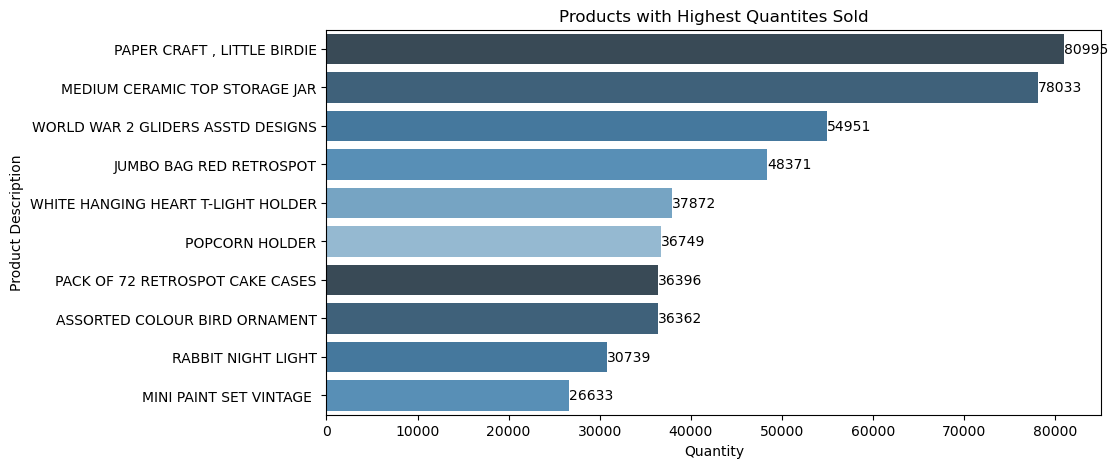

In [49]:
#Choosing Palette and reverse it
Palette = sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize = (10,5))
#Visualizing
ax =sns.barplot(y = 'Description' , x= 'Quantity' , data = soldMost, palette = Palette)
#Data labels
ax.bar_label(ax.containers[0])
#Setting Title
plt.title('Products with Highest Quantites Sold')
plt.ylabel('Product Description')

country with high total orders

In [51]:
custCountry = data['Country'].value_counts().reset_index(drop = False).head(10)
custCountry.columns = ['Country','Counts'] # renaming the columns
custCountry

,Country,Counts
0,United Kingdom,479984
1,Germany,9025
2,France,8392
3,EIRE,7879
4,Spain,2479
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1958
8,Portugal,1492
9,Australia,1181


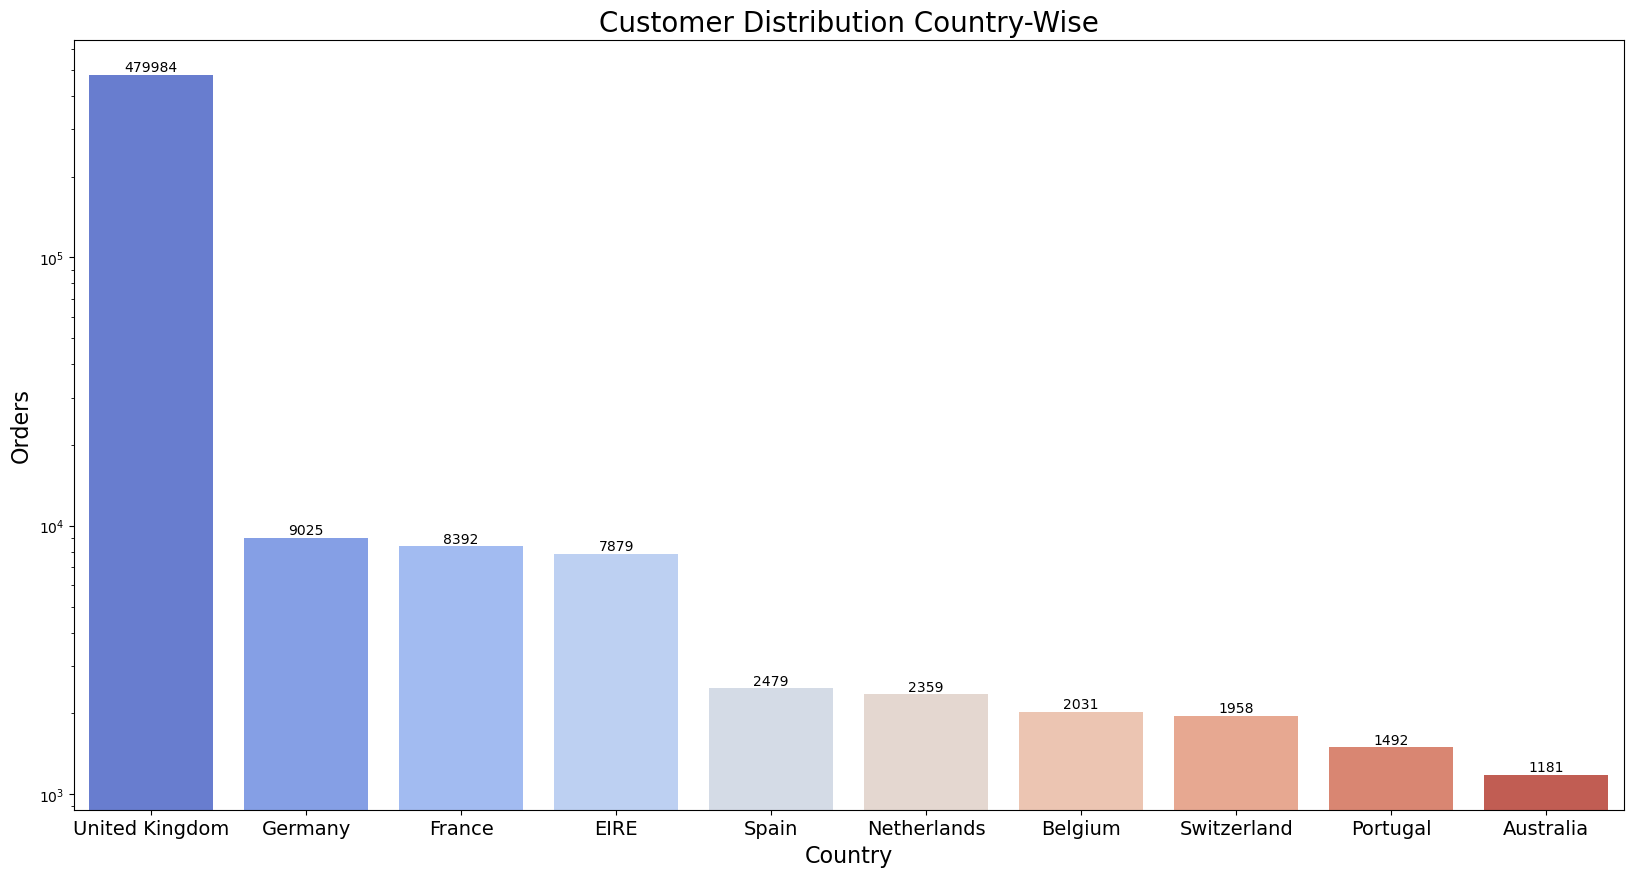

In [52]:
plt.figure(figsize = (20,10))
ax =sns.barplot(x= 'Country', y = 'Counts' , data = custCountry, palette = 'coolwarm')
ax.bar_label(ax.containers[0])
plt.title("Customer Distribution Country-Wise",fontsize=20)
plt.ylabel("Orders",fontsize = 16)
plt.xlabel('Country',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yscale('log')

In [53]:
daySales = data.groupby('Day').count()[['InvoiceNo']].reset_index()
daySales.columns = ['Day','Sales']
daySales.sort_values(by='Day')

,Day,Sales
0,Friday,79666
1,Monday,92466
2,Sunday,62339
3,Thursday,100213
4,Tuesday,98726
5,Wednesday,91467


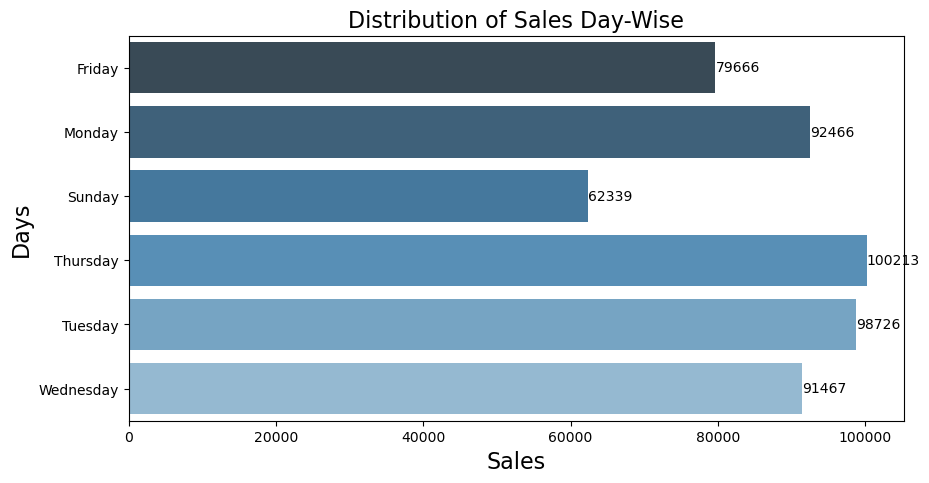

In [54]:
#Choosing Palette and reverse it
Palette = sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize = (10,5))
#Visualizing
ax =sns.barplot(y = 'Day' , x= 'Sales' , data = daySales, palette = Palette)
#Data labels
ax.bar_label(ax.containers[0])
#Setting Title
plt.title('Distribution of Sales Day-Wise',fontsize = 16)
plt.ylabel('Days',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.show()

RFM Analysis

In [55]:
#make a copy
copy = data.copy()
copy.head()
copy[~copy['InvoiceNo'].str.contains('C' ,na = False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12:50:00,December,Friday,2011,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12:50:00,December,Friday,2011,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,December,Friday,2011,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,December,Friday,2011,16.60,12


In [56]:
copy= copy.dropna(subset= ['CustomerID'])

In [57]:
copy['CheckoutPrice'] = copy['UnitPrice'] * copy['Quantity']
copy =copy[copy['UnitPrice']>0]
copy['InvoiceDate'] = pd.to_datetime(copy['InvoiceDate'])
copy['CustomerID'] = copy['CustomerID'].astype('int64')
recent_date = copy['InvoiceDate'].max()

In [58]:
rfm = copy.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (recent_date - date.max()).days ,
'InvoiceNo' : lambda num :num.nunique() ,
'CheckoutPrice' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm

,InvoiceDate,InvoiceNo,CheckoutPrice
CustomerID,,,
0,0,1427,1743839.85
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,178.05


In [59]:
rfm.columns = ['Recency' ,'Frequency' , 'Monetary']  # change column with this columns
rfm

,Recency,Frequency,Monetary
CustomerID,,,
0,0,1427,1743839.85
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,178.05


In [60]:
rfm = rfm[rfm['Monetary']>0]

In [61]:
rfm['Recency_Score'] = pd.qcut(rfm['Recency'] ,5 , labels= [5,4,3,2,1])

In [62]:
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method ='first') ,5 , labels= [1,2,3,4,5])

In [63]:
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'] ,5 , labels= [1,2,3,4,5])

In [64]:
rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) +
rfm['Monetary_Score'].astype(str) )

In [65]:
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
CustomerID,,,,,,,
0,0,1427,1743839.85,5,5,5,555
12346,325,1,77183.60,1,1,5,115
12347,1,7,4310.00,5,5,5,555
12348,74,4,1797.24,2,4,4,244
12349,18,1,1757.55,4,1,4,414
...,...,...,...,...,...,...,...
18280,277,1,180.60,1,2,1,121
18281,180,1,80.82,1,2,1,121
18282,7,2,178.05,5,3,1,531
